In [1]:
start_date = '2018-05-01'
end_date = '2019-12-31'

In [2]:
series_length = 15
prediction_length = 3
training_period = 18
test_period = 2

# 1. Importing the Dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_data = pd.read_csv('./combined_data.csv')

In [5]:
df_data

,date,polarity,subjectivity,filtered_polarity,filtered_subjectivity,open,close,high,low,change,volume,market_cap
0,2018-05-01,0.011905,0.202381,0,1,9251.47,9119.01,9255.88,8891.05,-1.43,7713019904,155114132125
1,2018-05-02,0.030485,0.427697,0,1,9104.60,9235.92,9256.52,9015.14,1.44,7558159872,157119854754
2,2018-05-03,-0.043210,0.136728,0,0,9233.97,9743.86,9798.33,9188.15,5.52,10207299584,165778380092
3,2018-05-04,-0.013889,0.057540,0,0,9695.50,9700.76,9779.20,9585.96,0.05,8217829888,165062796742
4,2018-05-05,0.075000,0.183333,0,0,9700.28,9858.15,9964.50,9695.12,1.63,7651939840,167759953654
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2019-12-27,0.042045,0.125568,0,0,7238.14,7290.09,7363.53,7189.93,0.72,22777360996,132139502950
603,2019-12-28,0.010038,0.297348,0,1,7289.03,7317.99,7399.04,7286.91,0.40,21365673026,132659059740
604,2019-12-29,0.086806,0.336111,0,1,7317.65,7422.65,7513.95,7279.87,1.43,22445257702,134570835775
605,2019-12-30,-0.004835,0.306070,0,1,7420.27,7293.00,7454.82,7276.31,-1.72,22874131672,132235128152


In [6]:
df_data.shape

(607, 12)

# 2. Training and Test Split

In [7]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [8]:
dt_training_start = datetime.strptime(start_date, '%Y-%m-%d')
dt_test_start = dt_training_start + relativedelta(months=training_period)
dt_training_end = dt_test_start + relativedelta(days=-1)
dt_test_end = dt_training_end + relativedelta(months=test_period)

In [9]:
str_training_start = "{:%Y-%m-%d}".format(dt_training_start)
str_training_end = "{:%Y-%m-%d}".format(dt_training_end)

In [10]:
str_test_start = "{:%Y-%m-%d}".format(dt_test_start)
str_test_end = "{:%Y-%m-%d}".format(dt_test_end)

In [11]:
print("training_start: {}, training_end: {}".format(str_training_start, str_training_end))
print("test_start: {}, test_end: {}".format(str_test_start, str_test_end))

training_start: 2018-05-01, training_end: 2019-10-31
test_start: 2019-11-01, test_end: 2019-12-31


In [12]:
df_train = df_data[(df_data.date >= str_training_start) & (df_data.date <= str_training_end)]
df_train

,date,polarity,subjectivity,filtered_polarity,filtered_subjectivity,open,close,high,low,change,volume,market_cap
0,2018-05-01,0.011905,0.202381,0,1,9251.47,9119.01,9255.88,8891.05,-1.43,7713019904,155114132125
1,2018-05-02,0.030485,0.427697,0,1,9104.60,9235.92,9256.52,9015.14,1.44,7558159872,157119854754
2,2018-05-03,-0.043210,0.136728,0,0,9233.97,9743.86,9798.33,9188.15,5.52,10207299584,165778380092
3,2018-05-04,-0.013889,0.057540,0,0,9695.50,9700.76,9779.20,9585.96,0.05,8217829888,165062796742
4,2018-05-05,0.075000,0.183333,0,0,9700.28,9858.15,9964.50,9695.12,1.63,7651939840,167759953654
...,...,...,...,...,...,...,...,...,...,...,...,...
541,2019-10-27,0.019048,0.180952,0,0,9241.71,9551.71,9749.53,9112.54,3.35,32593129501,172087039875
542,2019-10-28,0.018939,0.290909,0,1,9565.10,9256.15,9805.12,9256.15,-3.23,30948255332,166777392742
543,2019-10-29,0.015398,0.157472,0,0,9248.44,9427.69,9516.18,9232.65,1.94,28426779937,169883866262
544,2019-10-30,0.035014,0.148224,0,0,9422.46,9205.73,9426.87,9085.37,-2.30,27706531577,165899500650


In [13]:
df_test = df_data[(df_data.date >= str_test_start) & (df_data.date <= str_test_end)]
df_test

,date,polarity,subjectivity,filtered_polarity,filtered_subjectivity,open,close,high,low,change,volume,market_cap
546,2019-11-01,0.024022,0.187245,0,0,9193.99,9261.10,9275.66,9132.05,0.73,24324691031,166928044164
547,2019-11-02,-0.012727,0.261117,0,1,9259.78,9324.72,9377.49,9249.59,0.70,21242676385,168090392935
548,2019-11-03,-0.050000,0.172222,0,0,9324.79,9235.35,9379.81,9141.25,-0.96,21132220847,166495319475
549,2019-11-04,-0.068793,0.297294,0,1,9235.61,9412.61,9505.05,9191.49,1.92,26170255634,169706332936
550,2019-11-05,0.098990,0.251818,0,1,9413.00,9342.53,9457.42,9256.93,-0.75,26198609048,168459778835
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2019-12-27,0.042045,0.125568,0,0,7238.14,7290.09,7363.53,7189.93,0.72,22777360996,132139502950
603,2019-12-28,0.010038,0.297348,0,1,7289.03,7317.99,7399.04,7286.91,0.40,21365673026,132659059740
604,2019-12-29,0.086806,0.336111,0,1,7317.65,7422.65,7513.95,7279.87,1.43,22445257702,134570835775
605,2019-12-30,-0.004835,0.306070,0,1,7420.27,7293.00,7454.82,7276.31,-1.72,22874131672,132235128152


In [14]:
df_data = pd.concat([df_train, df_test])

# 3. Preprocessing

In [15]:
from sklearn import preprocessing

In [16]:
def preprocess(dataframe, isTraining):
    df = dataframe.copy()
    df["future_price"] = df['close'].shift(-prediction_length)
    
    # Drop any NaN values
    df.dropna(inplace=True)
    
    # Compare future BTC price with today's price and labeling it as 1 if price increases and zero otherwise
    df["label"] = np.where(df["future_price"] >= df["close"], 1, 0)
    
    # Drop 'future_price' column as it is no longer required
    df.drop('future_price', 1, inplace=True)
    
    temp = df.loc[:, df.columns != 'label']
        
    cols = temp.columns
    scaler = preprocessing.StandardScaler()
    scaled_df = scaler.fit_transform(temp)
    temp = pd.DataFrame(scaled_df, columns=cols)
        
    sequence = []
    
    for i in range (len(temp) - series_length):
        sequence.append([np.array(temp[i:i+series_length]), df.iloc[i+series_length, -1]])
    
    X = []
    y = []
    
    increases = []
    decreases = []
    
    for seq, label in sequence:
        if label == 0:
            decreases.append([seq, label])
        else:
            increases.append([seq, label])
            
    len_increases = len(increases)
    len_decreases = len(decreases)
            
    print("increase_count= {} , decrease_count= {}".format(len_increases, len_decreases))
    
    if isTraining:
        if(len_increases < len_decreases):
            increases = increases[:len_increases]
            decreases = decreases[:len_increases]
        else:
            increases = increases[:len_decreases]
            decreases = decreases[:len_decreases]
            
    print("increase_count= {} , decrease_count= {}\n".format(len(increases), len(decreases)))
    
    sequence = increases + decreases
    
    if isTraining:
        np.random.seed(42)
        np.random.shuffle(sequence)
    
    for seq ,label in sequence:
        X.append(seq)
        y.append(label)
        
    return np.array(X), np.array(y)    

In [17]:
selected_features = ['filtered_polarity','subjectivity', 'open', 'close', 'high', 'low', 'volume', 'market_cap']

In [18]:
df_test_for_sequence = df_data[len(df_data) - len(df_test) - series_length:]

In [19]:
X_train, y_train = preprocess(df_train[selected_features], True)
X_test, y_test = preprocess(df_test_for_sequence[selected_features], False)

increase_count= 267 , decrease_count= 261
increase_count= 261 , decrease_count= 261

increase_count= 21 , decrease_count= 37
increase_count= 21 , decrease_count= 37



In [20]:
X_train.shape

(522, 15, 8)

In [21]:
X_train[0]

array([[ 3.28823415,  2.15686452, -0.69114653, -0.68589871, -0.70718045,
        -0.65822639,  0.25856067, -0.65369902],
       [-0.27566035,  0.10798752, -0.68561683, -0.70183759, -0.7132988 ,
        -0.67539027,  0.37579495, -0.66901748],
       [-0.27566035, -0.52108783, -0.70127797, -0.65823449, -0.6920359 ,
        -0.67201793,  0.39416752, -0.62598844],
       [-0.27566035, -0.11641947, -0.65775747, -0.63631484, -0.66964831,
        -0.61794669,  0.36862868, -0.6042601 ],
       [-0.27566035,  1.47130872, -0.63603096, -0.59304916, -0.627008  ,
        -0.59755063,  0.49219325, -0.56140244],
       [-0.27566035, -0.84244211, -0.59253155, -0.48211812, -0.48647411,
        -0.55551469,  1.01418679, -0.45229882],
       [-3.83955485,  0.01450264, -0.48132609, -0.4555969 , -0.47788143,
        -0.48751176,  0.86653933, -0.42591924],
       [-0.27566035,  0.46337846, -0.47183999, -0.49117784, -0.51220716,
        -0.48391169,  0.63212048, -0.46040099],
       [-0.27566035,  1.08568358

In [22]:
df_test[:len(df_test)-prediction_length].to_csv('./output/test_data.csv', index=False)
np.savetxt('./output/y_test', y_test, delimiter=',')

# 3. RNN LSTM Model

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.utils import plot_model

Using TensorFlow backend.


In [24]:
batch_size = 32
epochs = 50

In [25]:
def create_model():
    model=Sequential()
    model.add(LSTM(256,input_shape=(X_train.shape[1:]),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(LSTM(256,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(LSTM(256,return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2,activation='softmax'))
    
    return model    

In [26]:
model = create_model()

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 15, 256)           271360    
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 256)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 256)           1024      
_________________________________________________________________
lstm_2 (LSTM)                (None, 15, 256)           525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 256)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 256)           1024      
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)              

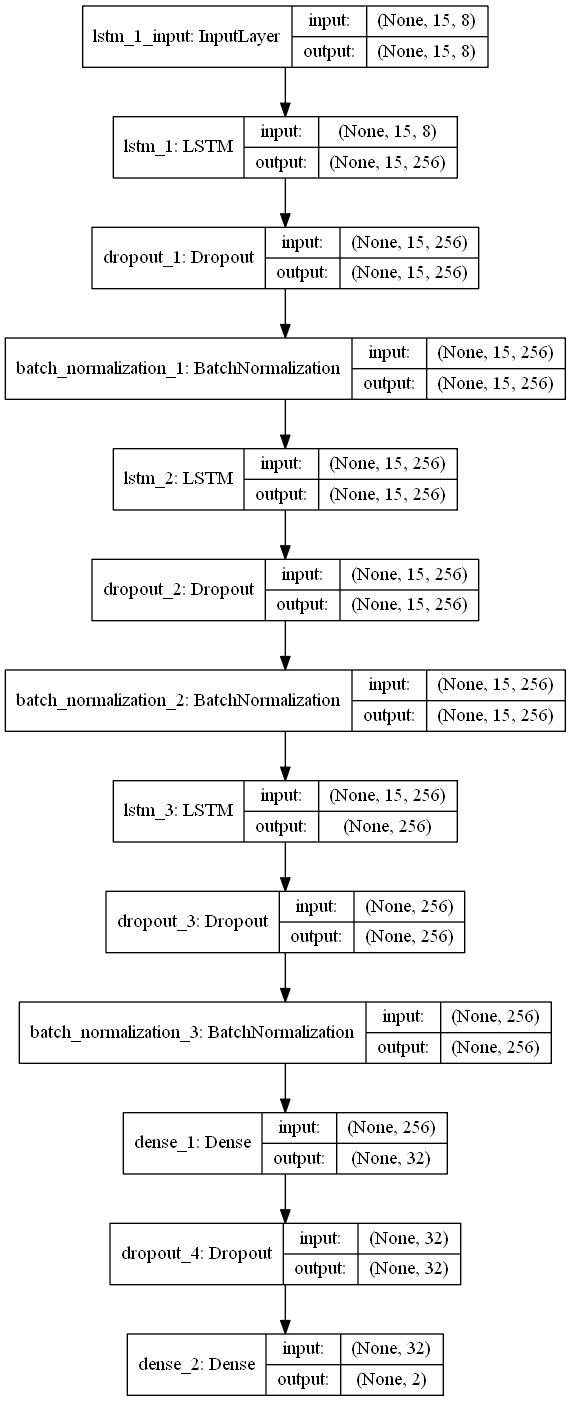

In [28]:
plot_model(model, show_shapes=True, to_file='model.png')

In [29]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [30]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=False,
                    validation_split=0.1)

# 4. Model Evaluation

In [31]:
import matplotlib.pyplot as plt
# Plot data to see relationship in training and validation data
def plot_accuracy(hist):
    epoch_list=list(range(1, len(hist.history['accuracy']) + 1)) # values for x axis [1, 2, 3, 4, ..., # of epochs]
    plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
    plt.legend(('Training Accuracy', 'Validation Accuracy'))
    plt.show()

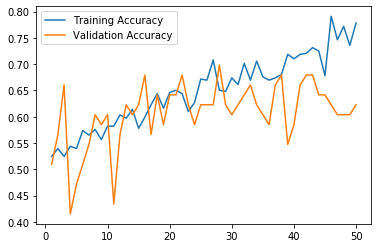

In [32]:
plot_accuracy(history)

In [33]:
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

58/58 [==============================] - 0s 414us/step
Test score: 0.8438606714380199
Test accuracy: 0.6206896305084229


In [34]:
## Import library to check other metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
predictions = model.predict(X_test, verbose=1)
predictions = np.argmax(predictions, axis=-1)

58/58 [==============================] - 0s 4ms/step


In [36]:
np.savetxt('./output/predictions', predictions, delimiter=',')

In [37]:
matrix = confusion_matrix(y_test, predictions.round())
print('confusion_matrix')
print(matrix)

confusion_matrix
[[26 11]
 [11 10]]


In [38]:
report = classification_report(y_test, predictions.round())
print(report)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        37
           1       0.48      0.48      0.48        21

    accuracy                           0.62        58
   macro avg       0.59      0.59      0.59        58
weighted avg       0.62      0.62      0.62        58



# 5. Save the model

In [39]:
model.save('sentiment-lstm.h5')